In [0]:
cd /content/drive/"My Drive"/"Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


Import dependencies

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score


%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Read in data

In [0]:
titanic = pd.read_csv("data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Clean up data

In [0]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
titanic["Age"].fillna(titanic["Age"].mean(), inplace=True)

Combine sibSp & parch

<Figure size 432x288 with 0 Axes>

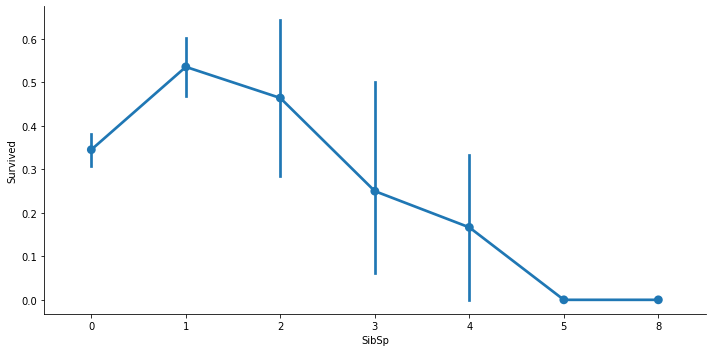

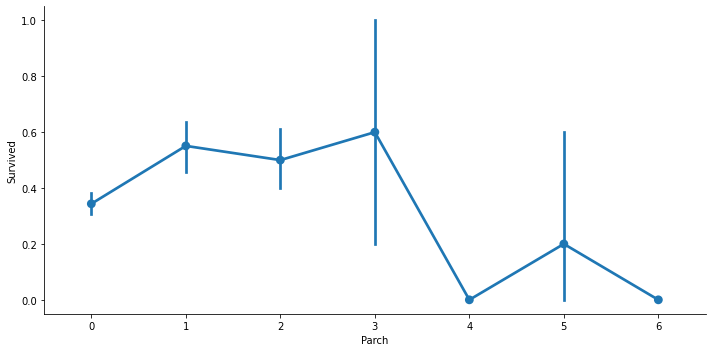

In [0]:
for i, col in enumerate(["SibSp","Parch"]):
  plt.figure(i)
  sns.catplot(x=col, y="Survived", data=titanic, kind ="point", aspect=2)

In [0]:
titanic["Family_cnt"] = titanic["SibSp"] + titanic["Parch"]

In [0]:
#axis = 1 is for columns, axis=0 is for rows
titanic.drop(["PassengerId","SibSp","Parch"],axis=1,inplace=True)

Cleaning up Categorical Features

In [0]:
#create indicator for cabin
titanic["Cabin_ind"] = np.where(titanic["Cabin"].isnull(),0,1)

In [0]:
#convert sex to numberic

#create dictionary
gender = {'male':0,'female':1}

#map gender to map
titanic["Sex"] = titanic["Sex"].map(gender)

In [0]:
#drop unnecessary features
titanic.drop(["Cabin","Embarked","Name","Ticket"],axis=1,inplace=True)

In [0]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


Split data into training, validation, and test sets

In [0]:
features = titanic.drop("Survived",axis=1)
labels = titanic["Survived"]

x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.4,random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test,y_test,test_size=0.5,random_state=42)

In [0]:
for dataset in [y_train, y_val, y_test]:
  print(round(len(dataset)/len(labels),2))

0.6
0.2
0.2


Build the model

In [0]:
rf = RandomForestClassifier()
scores = cross_val_score(rf,x_train,y_train.values.ravel(),cv=5)
#.values.ravel() turns pandas data object into an array for sklearn to handle
# random forest createst a decition tree forest

In [0]:
scores

array([0.82242991, 0.82242991, 0.80373832, 0.80373832, 0.81132075])

In [0]:
#to help us figure out the best parameters
def print_results(results):
  print("Best Parameters: {}\n".format(results.best_params_))

  means = results.cv_results_['mean_test_score']
  stds = results.cv_results_['std_test_score']
  for mean, std, params in zip(means, stds, results.cv_results_['params']):
    print('{} (+/-{}) for {}'.format(round(mean,3),round(std*2,3),params))

In [0]:
parameters = {
    'n_estimators':[5,50,100],
    'max_depth':[2,10,20,None]
}

cv = GridSearchCV(rf,parameters, cv=5)
cv.fit(x_train,y_train.values.ravel())

print_results(cv)

Best Parameters: {'max_depth': 10, 'n_estimators': 50}

0.798 (+/-0.108) for {'max_depth': 2, 'n_estimators': 5}
0.79 (+/-0.104) for {'max_depth': 2, 'n_estimators': 50}
0.798 (+/-0.127) for {'max_depth': 2, 'n_estimators': 100}
0.79 (+/-0.072) for {'max_depth': 10, 'n_estimators': 5}
0.826 (+/-0.045) for {'max_depth': 10, 'n_estimators': 50}
0.817 (+/-0.059) for {'max_depth': 10, 'n_estimators': 100}
0.801 (+/-0.056) for {'max_depth': 20, 'n_estimators': 5}
0.805 (+/-0.036) for {'max_depth': 20, 'n_estimators': 50}
0.809 (+/-0.027) for {'max_depth': 20, 'n_estimators': 100}
0.809 (+/-0.037) for {'max_depth': None, 'n_estimators': 5}
0.807 (+/-0.028) for {'max_depth': None, 'n_estimators': 50}
0.809 (+/-0.032) for {'max_depth': None, 'n_estimators': 100}


The top 3 parameters are:

0.826 (+/-0.045) for {'max_depth': 10, 'n_estimators': 50}

0.817 (+/-0.059) for {'max_depth': 10, 'n_estimators': 100}

0.809 (+/-0.032) for {'max_depth': None, 'n_estimators': 100}

In [0]:
rf1 = RandomForestClassifier(n_estimators=50,max_depth=10)
rf1.fit(x_train, y_train.values.ravel())

rf2 = RandomForestClassifier(n_estimators=100,max_depth=10)
rf2.fit(x_train, y_train.values.ravel())

rf3 = RandomForestClassifier(n_estimators=100,max_depth=None)
rf3.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Evaluate Models on Validation Set

In [0]:
for mdl in [rf1,rf2,rf3]:
  y_pred = mdl.predict(x_val)
  accuracy= round(accuracy_score(y_val,y_pred),3)
  precision=round(precision_score(y_val,y_pred),3)
  recall=round(recall_score(y_val,y_pred),3)
  print('Max Depth: {}/ # of Est: {} --A: {} /P: {}/R: {}'.format(mdl.max_depth,mdl.n_estimators,accuracy,precision,recall))

Max Depth: 10/ # of Est: 50 --A: 0.804 /P: 0.825/R: 0.684
Max Depth: 10/ # of Est: 100 --A: 0.832 /P: 0.871/R: 0.711
Max Depth: None/ # of Est: 100 --A: 0.821 /P: 0.814/R: 0.75


Run model on test set

In [0]:
y_pred = rf2.predict(x_test)
accuracy=round(accuracy_score(y_test,y_pred),3)
precision=round(precision_score(y_test,y_pred),3)
recall=round(recall_score(y_test,y_pred),3)
print('Max Depth: {}/ # of Est: {} --A: {} /P: {}/R: {}'.format(mdl.max_depth,mdl.n_estimators,accuracy,precision,recall))


Max Depth: None/ # of Est: 100 --A: 0.787 /P: 0.737/R: 0.646
